# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import  make_pipeline
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Подготовка данных

In [190]:
data_train=pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test=pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full=pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [240]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,recovery
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794


In [192]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [193]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [194]:
data_train['rougher.output.recovery'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

### Анализ признаков, недоступных в тестовой выборке

In [195]:
train_only_feature=[]
for i in data_train.columns:
    if i not in data_test.columns:
        train_only_feature.append(i)
train_only_feature

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В тестовом датафрейме отсуствуют параметры output, то есть параметры продукта измеряемые после каждого этапа. Очевидно, что мы строим модель для того, что бы не считать эти параметры эмпирическим путем. По трейну считаем целевой признак, руководствуясь output'ами. И обучаем модель по фичам из теста, и должны получить предсказания на сырой массе сырья

### Проверка на пропуски и предобработка данных

In [196]:
data_train.isna().mean()

date                                          0.000000
final.output.concentrate_ag                   0.000071
final.output.concentrate_pb                   0.000071
final.output.concentrate_sol                  0.014913
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000071
secondary_cleaner.state.floatbank5_b_air      0.000071
secondary_cleaner.state.floatbank5_b_level    0.000071
secondary_cleaner.state.floatbank6_a_air      0.000141
secondary_cleaner.state.floatbank6_a_level    0.000071
Length: 87, dtype: float64

Так как измерения идут по времени, соответсвенно пропуски можно заполнить предыдущими/последующими замерами, которые должны находиться соизмеримом интервале

In [197]:

data_train=data_train.fillna(method='bfill')
data_test=data_test.fillna(method='bfill')
data_full=data_full.fillna(method='bfill')

In [198]:
train_frame = data_train.dropna(subset=["rougher.output.recovery","final.output.recovery"],axis = 0)

imputer = KNNImputer()
without_nan = pd.DataFrame(data = imputer.fit_transform(data_train.drop(['date'],axis = 1)),
             columns= data_train.drop(['date'],axis = 1).columns,
             index = data_train.index)
#data_test=data_test.drop(['date'],axis = 1)
data_test = data_test.dropna(subset= ['date'],axis = 0)
test_frame_for_target = data_test.merge(data_full.loc[:,['date',"rougher.output.recovery","final.output.recovery"]],on = 'date')
test_frame_for_target = test_frame_for_target.dropna(subset=["rougher.output.recovery","final.output.recovery"],axis = 0)
data_test = test_frame_for_target.loc[:,data_test.columns]
target_test_rougher = test_frame_for_target["rougher.output.recovery"]
target_test_final = test_frame_for_target["final.output.recovery"]
data_test = data_test.drop("date",axis =1)
imputer_test = KNNImputer()
test_without_nan = pd.DataFrame(data = imputer_test.fit_transform(data_test),
             columns= data_test.columns,
             index = data_test.index)

Пропуски заполнены

### Проверка, что эффективность обогащения рассчитана верно

In [199]:
data_train['recovery']=\
data_train['rougher.output.concentrate_au']*\
(data_train['rougher.input.feed_au']-data_train['rougher.output.tail_au'])/\
(data_train['rougher.input.feed_au']*\
(data_train['rougher.output.concentrate_au']-data_train['rougher.output.tail_au']))*100


In [200]:
#data_train['recovery']

In [201]:
mean_absolute_error(data_train['rougher.output.recovery'],data_train['recovery'])

9.73512347450521e-15

Ошибка минимальна, проверка выполнена

## Анализ данных

### Концентрации металлов

In [202]:
print("Концентрация металлов до флотации")
print("Концентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}".
format(data_train["rougher.input.feed_ag"].mean(),
data_train["rougher.input.feed_pb"].mean(),
data_train["rougher.input.feed_au"].mean()))
print()
print("Концентрация металлов после флотации")
print("Коцентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}".
format(data_train["rougher.output.concentrate_ag"].mean(),
data_train["rougher.output.concentrate_pb"].mean(),
data_train["rougher.output.concentrate_au"].mean()))
print()
print("Концентрация металлов после первичной очистки")
print("Концентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}".
format(data_train["primary_cleaner.output.concentrate_ag"].mean(),
data_train["primary_cleaner.output.concentrate_pb"].mean(),
data_train["primary_cleaner.output.concentrate_au"].mean()))
print()
print("Концентрация металлов поcле вторичной очистки")
print("Концентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}".
format(data_train["final.output.concentrate_ag"].mean(),
data_train["final.output.concentrate_pb"].mean(),
data_train["final.output.concentrate_au"].mean()))

Концентрация металлов до флотации
Концентрация Серебра: 8.58,Свинца: 3.51,Золота: 7.87

Концентрация металлов после флотации
Коцентрация Серебра: 11.78,Свинца: 7.66,Золота: 19.44

Концентрация металлов после первичной очистки
Концентрация Серебра: 8.20,Свинца: 9.57,Золота: 32.39

Концентрация металлов поcле вторичной очистки
Концентрация Серебра: 5.14,Свинца: 10.13,Золота: 44.00


In [260]:
h_data_au=[data_train["rougher.input.feed_au"],
data_train["rougher.output.concentrate_au"],
data_train["primary_cleaner.output.concentrate_au"],
           data_train["final.output.concentrate_au"]]

h_data_pb=[data_train["rougher.input.feed_pb"],
data_train["rougher.output.concentrate_pb"],
data_train["primary_cleaner.output.concentrate_pb"],
           data_train["final.output.concentrate_pb"]]

h_data_ag=[data_train["rougher.input.feed_ag"],
data_train["rougher.output.concentrate_ag"],
data_train["primary_cleaner.output.concentrate_ag"],
           data_train["final.output.concentrate_ag"]]

hists=[h_data_au,h_data_pb,h_data_ag]
name=['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']

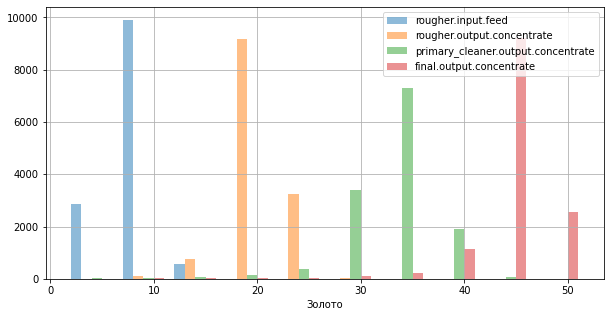

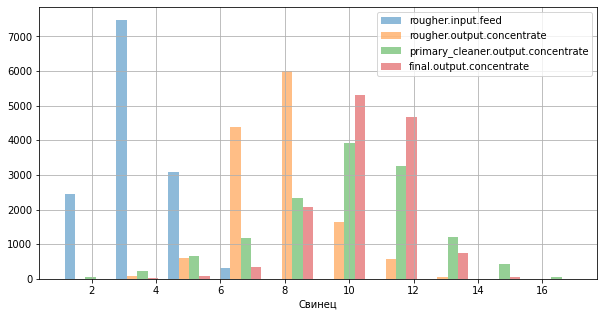

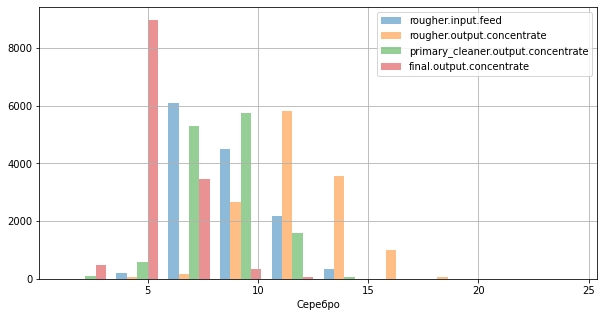

<Figure size 720x360 with 0 Axes>

In [291]:
fig=plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
element=['Золото','Свинец','Серебро']
for i in range(len(hists)):
    plt.hist(hists[i],alpha = 0.5,label=name)
    plt.legend()
    plt.xlabel(element[i])
    plt.grid()
    plt.show();
    fig=plt.figure(figsize=(10, 5))
    



Можно заметить, что концентрация золота и свинца после очисток растет, а серебро начинает истощаться в концетрате начиная с первичной очистки

### Размеры гранул

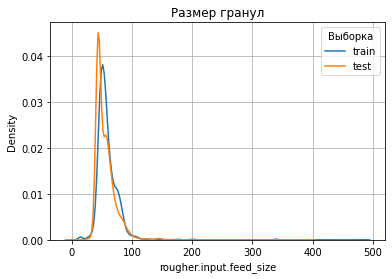

In [210]:
for frame,name in zip([data_train,data_test],
                       ["train","test"]):
    subset = frame["rougher.input.feed_size"]

    sns.distplot(subset, hist = False, kde = True,
                 label = name)
plt.legend(prop={'size': 10}, title = 'Выборка')
plt.title('Размер гранул');
plt.grid(visible=True)

Виден, незначительный дисбаланс в выборках.

### Суммарная концентрация всех веществ на разных стадиях

In [211]:
def summ_conc(row):
    list_of_steps = ["rougher","primary_cleaner","final"]
    input_feed_au = row["rougher.input.feed_au"]
    input_feed_ag = row["rougher.input.feed_ag"]
    input_feed_pb = row["rougher.input.feed_pb"]
    input_feed_sol = row["rougher.input.feed_sol"]
    out_rougher = []
    out_primary_cleaner = []
    out_final = []
    list_of_arrays =[out_rougher,out_primary_cleaner,out_final]
    for step,array in zip(list_of_steps,list_of_arrays):
        array.append(row[step+".output.concentrate_au"])
        array.append(row[step+".output.concentrate_ag"])
        array.append(row[step+".output.concentrate_pb"])
        array.append(row[step+".output.concentrate_sol"])
    sum_before_steps = input_feed_ag+input_feed_au+input_feed_pb+input_feed_sol
    sum_rougher = sum(out_rougher)
    sum_primary = sum(out_primary_cleaner)
    sum_final = sum(out_final)
    return pd.Series([sum_before_steps,sum_rougher,sum_primary,sum_final])
    

In [212]:
summ = data_train.apply(summ_conc,axis = 1)
summ.columns = ["before_rougher","rougher","primary_cleaner","final"]

Построю распределение

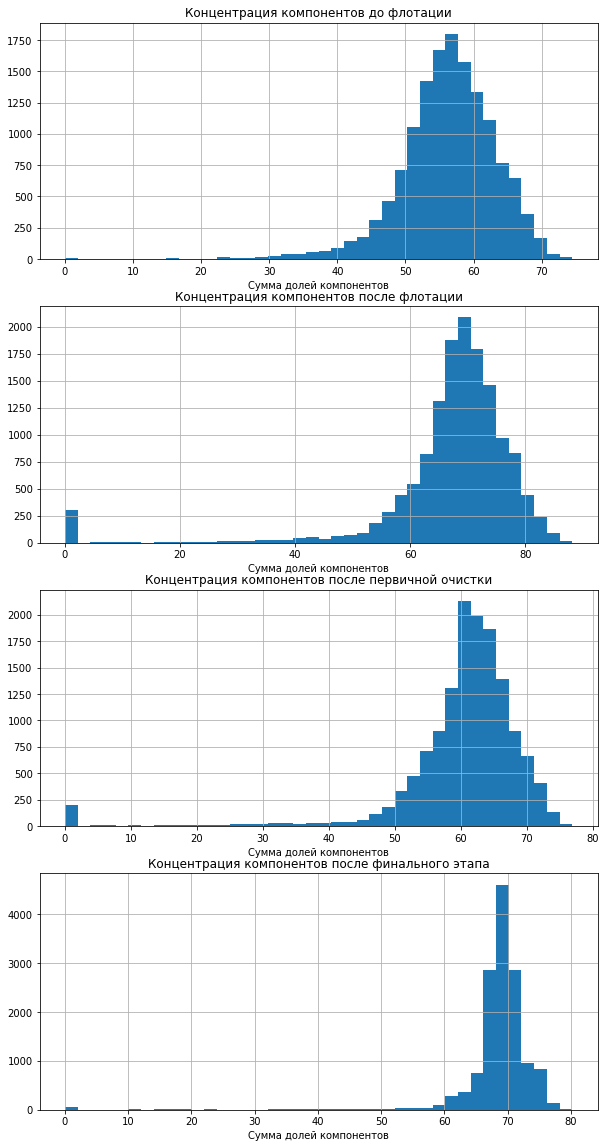

In [213]:
fig,ax = plt.subplots(4,1,figsize = (10,20))

ax[0].hist(summ["before_rougher"],bins = 40)
ax[1].hist(summ["rougher"],bins = 40)
ax[2].hist(summ["primary_cleaner"],bins = 40)
ax[3].hist(summ["final"],bins = 40)
ax[0].set_xlabel("Сумма долей компонентов")
ax[1].set_xlabel("Сумма долей компонентов")
ax[2].set_xlabel("Сумма долей компонентов")
ax[3].set_xlabel("Сумма долей компонентов")
ax[0].set_title("Концентрация компонентов до флотации")
ax[1].set_title("Концентрация компонентов после флотации")
ax[2].set_title("Концентрация компонентов после первичной очистки")
ax[3].set_title("Концентрация компонентов после финального этапа")
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
plt.show()

Видно, что во всех распределениях присутствует пик около нулевого значения. Он далек от общего распределения, это выброс и его следует удалить. Так же это стоит проделать и в тестовой выборке.

In [214]:
data_train = data_train.drop(index = data_train[data_train["rougher.input.feed_au"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.input.feed_ag"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.input.feed_pb"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.input.feed_sol"] < 1].index,
                               axis = 0)


data_train = data_train.drop(index = data_train[data_train["rougher.output.concentrate_au"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.output.concentrate_ag"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.output.concentrate_pb"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["rougher.output.concentrate_sol"] < 1].index,
                               axis = 0)

data_train = data_train.drop(index = data_train[data_train["primary_cleaner.output.concentrate_au"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["primary_cleaner.output.concentrate_ag"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["primary_cleaner.output.concentrate_pb"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["primary_cleaner.output.concentrate_sol"] < 1].index,
                               axis = 0)

data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_au"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_ag"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_pb"] < 1].index,
                               axis = 0)
data_train = data_train.drop(index = data_train[data_train["final.output.concentrate_sol"] < 1].index,
                               axis = 0)

In [215]:
summ = data_train.apply(summ_conc,axis = 1)
summ.columns = ["before_rougher","rougher","primary_cleaner","final"]

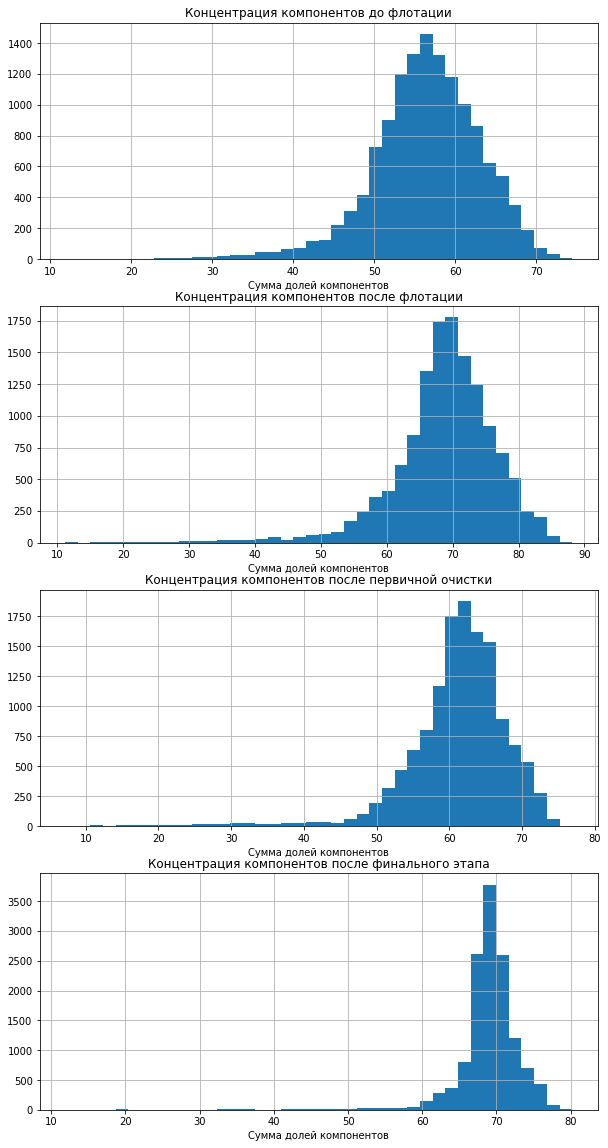

In [216]:
fig,ax = plt.subplots(4,1,figsize = (10,20))

ax[0].hist(summ["before_rougher"],bins = 40)
ax[1].hist(summ["rougher"],bins = 40)
ax[2].hist(summ["primary_cleaner"],bins = 40)
ax[3].hist(summ["final"],bins = 40)
ax[0].set_xlabel("Сумма долей компонентов")
ax[1].set_xlabel("Сумма долей компонентов")
ax[2].set_xlabel("Сумма долей компонентов")
ax[3].set_xlabel("Сумма долей компонентов")
ax[0].set_title("Концентрация компонентов до флотации")
ax[1].set_title("Концентрация компонентов после флотации")
ax[2].set_title("Концентрация компонентов после первичной очистки")
ax[3].set_title("Концентрация компонентов после финального этапа")
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
plt.show()

Уберу выбросы в тетсе

In [217]:
data_test = data_test.drop(index = data_test[data_test["rougher.input.feed_au"] < 1].index,
                               axis = 0)
data_test = data_test.drop(index = data_test[data_test["rougher.input.feed_ag"] < 1].index,
                               axis = 0)
data_test = data_test.drop(index = data_test[data_test["rougher.input.feed_pb"] < 1].index,
                               axis = 0)
data_test = data_test.drop(index = data_test[data_test["rougher.input.feed_sol"] < 1].index,
                               axis = 0)

In [218]:
train_features_dataset_rougher = without_nan.loc[:,data_test.columns]
train_target_dataset_rougher = without_nan['rougher.output.recovery']
train_features_dataset_final = train_features_dataset_rougher 
train_target_dataset_final = without_nan['final.output.recovery']

In [219]:
train_target_dataset_rougher

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64

## Модель

Выделю фичи и таргеты 

In [220]:
train_features_dataset_rougher = data_train.loc[:,data_test.columns]
train_target_dataset_rougher = data_train['rougher.output.recovery']
train_features_dataset_final = train_features_dataset_rougher 
train_target_dataset_final = data_train['final.output.recovery']

### Инициализирую метрики по заданию

In [222]:
def sMAPE(y_true,y_pred):
    error = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100
    return error

In [223]:
def final_sMAPE(sMAPE_rougher,sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

In [224]:
my_score = make_scorer(sMAPE,greater_is_better=False)

### Обучение

In [225]:
model = make_pipeline(StandardScaler(),RandomForestRegressor())
model2 = make_pipeline(StandardScaler(),DecisionTreeRegressor())

In [226]:
params_RF = {"randomforestregressor__n_estimators":[5,100],
             "randomforestregressor__max_depth":[1,10]}
params_DT= {"decisiontreeregressor__max_depth":[1,10]}
grid_rougher = GridSearchCV(model,param_grid = params_RF,scoring=my_score)
grid_final = GridSearchCV(model,param_grid = params_RF,scoring=my_score)
grid_rougher_DT = GridSearchCV(model2,param_grid = params_DT,scoring=my_score)
grid_final_DT = GridSearchCV(model2,param_grid = params_DT,scoring=my_score)

In [227]:
train_features_dataset_rougher.isna().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

In [228]:
train_target_dataset_rougher

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 13323, dtype: float64

In [229]:
grid_rougher.fit(train_features_dataset_rougher,train_target_dataset_rougher)
grid_final.fit(train_features_dataset_final,train_target_dataset_final)
grid_rougher_DT.fit(train_features_dataset_rougher,train_target_dataset_rougher)
grid_final_DT.fit(train_features_dataset_final,train_target_dataset_final)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': [1, 10]},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [230]:
print("Лучшие модели")
print(grid_rougher.best_estimator_)
print(grid_rougher.best_estimator_)
print(grid_rougher_DT.best_estimator_)
print(grid_final_DT.best_estimator_)

Лучшие модели
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=10))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=10))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])


In [231]:
best_score_rougher = grid_rougher.best_score_
best_score_final = grid_final.best_score_
best_score_rougher_DT = grid_rougher_DT.best_score_
best_score_final_DT = grid_final_DT.best_score_

Топ модель

In [232]:
print("rougher")
print("RandomForest",best_score_rougher,"DecisionTree",best_score_rougher_DT)
print("final")
print("RandomForest",best_score_final,"DecisionTree",best_score_final_DT)

rougher
RandomForest -6.740341577251362 DecisionTree -7.7896651811057795
final
RandomForest -9.15969513652236 DecisionTree -9.205603540291179


Рандомный лес имеет меньшую ошибку

### Проверяем результаты на лучшей модели

In [233]:
final_sMAPE(best_score_rougher,best_score_final)

-8.554856746704612

In [234]:
final_sMAPE(best_score_rougher_DT,best_score_final_DT)

-8.85161895049483

In [235]:
#data_test=data_test.drop('date',axis=1)

In [236]:
rogher_test = grid_rougher.predict(test_without_nan)
final_test = grid_final.predict(test_without_nan)

Итоговая ошибка

In [237]:

final_sMAPE(sMAPE(target_test_rougher,rogher_test),sMAPE(target_test_final,final_test))

9.209102439639253

Протестирую baseline

In [238]:
base = DummyRegressor(strategy="median")
base_final = DummyRegressor(strategy="median")
base.fit(train_features_dataset_rougher,train_target_dataset_rougher)
base_final.fit(train_features_dataset_final,train_target_dataset_final)

DummyRegressor(strategy='median')

In [239]:
base_rougher = base.predict(test_without_nan)
base_final_pred = base_final.predict(test_without_nan)
final_sMAPE(sMAPE(target_test_rougher,base_rougher),sMAPE(target_test_final,base_final_pred))


9.423288652412822

Имеем адекватную ошибку полученню по sMAPE. Она меньше чем у baseline, что подтверждает ее адекавтность.

# Вывод

В проекте был проанализирован тех процесс обработки золотой руды. Была обучена модель для предсказания коэффициента восстановления золота из золотосодержащей руды.
Итоговая модель построена на моделе RandomForest, Ошибка на тестовой выборке: 9.17.
Параметр recovery в тренировочной выборке был рассчитан верно.
